# MLPRegressor, GridSearchCV
## Module import

In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

## GridSearchCV training and testing

In [5]:
# Set the directory containing the CSV files
input_dir = '../../1-preprocessing/data/8-splits/USD'

# Create DataFrames to store the results
mse_results = pd.DataFrame(columns=['Offset', 'MSE'])
r2_results = pd.DataFrame(columns=['Offset', 'R2'])

# Define the hyperparameter grid
param_grid = {
    'hidden_layer_sizes': [(50), (100), (200)],
    'activation': ['tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01]
}

offset = 30

train_data = pd.read_csv(os.path.join(input_dir, offset, "train_data.csv"))
test_data = pd.read_csv(os.path.join(input_dir, offset, "test_data.csv"))

# Split the data into features and target
X_train = train_data.iloc[:, 1:-1]
y_train = train_data.iloc[:, -1]
X_test = test_data.iloc[:, 1:-1]
y_test = test_data.iloc[:, -1]

# Initialize the MLPRegressor model
model = MLPRegressor(random_state=0)

# Perform grid search
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,             # 5-fold cross-validation
    scoring='r2',     # evaluation metric
    n_jobs=-1         # use all available CPU cores
)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

# Calculate the r2 score
r2 = r2_score(y_test, y_pred)

# Calculate the Directional Symmetry (hit rate)
hit_rate = (np.sign(y_pred) == np.sign(y_test)).mean()

# Print the results
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best R^2 score: {grid_search.best_score_:.3f}")
print(f"Directional Symmetry (hit rate): {hit_rate:.2f}")

Offset: 30
Best parameters: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 50, 'solver': 'adam'}
Best R^2 score: -0.058
Directional Symmetry (hit rate): 0.92


## Plot test set and prediction set

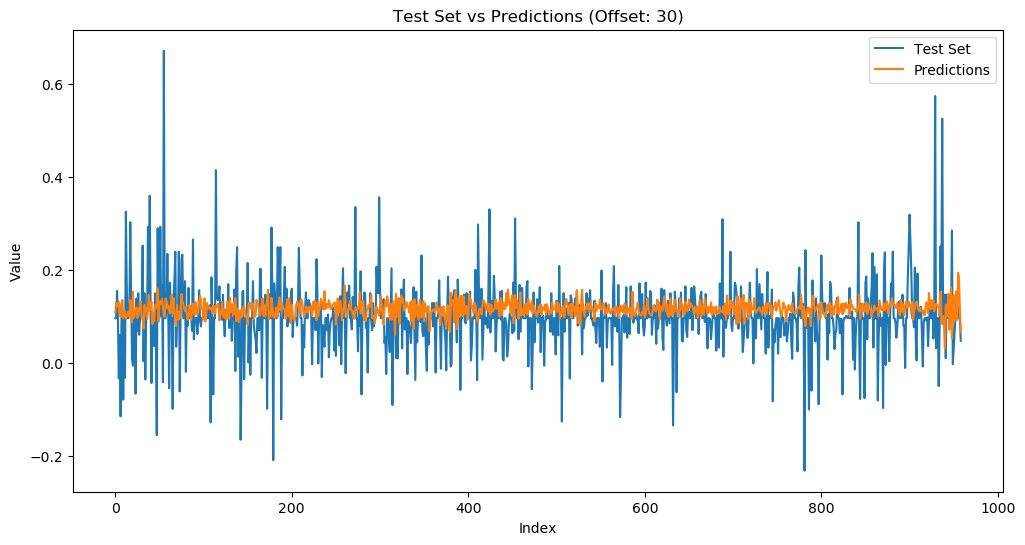

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Test Set')
plt.plot(y_pred, label='Predictions')
plt.title(f'Test Set vs Predictions (Offset: {offset})')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()